# EDA Hands-On Lab — Ames Housing Dataset *(Student Notebook)*

**Master's in Data Science — LUISS Guido Carli**

| | |
|---|---|
| **Format** | Hands-on practical lab (~90 min) |
| **Dataset** | Ames Housing — 1,460 houses, 81 features, target: SalePrice |
| **Slides** | EDA_Lecture.pptx — use as reference throughout |
| **Goal** | Execute a complete, systematic EDA workflow from raw data to modeling-ready features |

### How this notebook works
- **Pre-filled cells** → run them as-is (setup, helpers, visualizations)
- **TASK cells** → you write the code! Follow the instructions and slide references
- ** Hints** → nudge you in the right direction
- Tasks are numbered sequentially. Try before looking at the solution notebook!

| Step | What | Time | Slides |
|------|------|------|--------|
| 0 | Setup & Load | 3 min | 2 |
| 1 | First Contact — shape, types, sanity | 7 min | 4-6 |
| 2 | Data Types — numerical vs categorical | 7 min | 8-9 |
| 3 | Summary Statistics — center, spread, shape | 10 min | 11-16 |
| 4 | Univariate Analysis — distributions one at a time | 12 min | 18-22 |
| 5 | Bivariate Analysis — relationships between pairs | 15 min | 24-29 |
| 6 | Multivariate — PCA, pair plots | 8 min | 31-33 |
| 7 | Missing Data — patterns & imputation | 10 min | 36-38 |
| 8 | Outliers — detection & strategy | 8 min | 40-42 |
| 9 | Transformations — log, scaling, encoding | 8 min | 44-46 |
| 10 | Wrap-up — checklist & Anscombe | 2 min | 48-53 |

---
## Step 0 — Setup & Data Loading `[Slide 2]` 3 min

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', font_scale=1.05, palette='muted')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

# Color palette
NAVY, STEEL, CORAL, GREEN = '#1A3764', '#4682B4', '#E8735A', '#27AE60'

print(' Setup complete')

 Setup complete


In [3]:
# Load Ames Housing dataset
from sklearn.datasets import fetch_openml
ames = fetch_openml(name='house_prices', as_frame=True, parser='auto')
df = ames.frame.copy()
print(f'Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns')
df.head(3)

Loaded: 1,460 rows × 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [31]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int64  
 18  OverallCond    1460

---
## Step 1 — First Contact with the Data `[Slides 4-6]` 7 min

> *"Let the data speak — don't impose assumptions prematurely."* — Tukey

Before any analysis: **understand what you have**. Shape, types, basic sanity checks.

In [22]:
# TASK 1 
# Print the shape, memory usage, and first 20 column names of df
# Hint: Use df.shape, df.memory_usage(deep=True).sum(), df.columns[:20]
#
# YOUR CODE HERE
print(df.shape,"\n" ,df.memory_usage(deep=True).sum(),'\n', df.columns[:20] )




(1460, 81) 
 3619902 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt'],
      dtype='str')


In [27]:
# TASK 2 
# Check for duplicate rows and verify the Id column is unique
# Hint: df.duplicated().sum() and df['Id'].nunique()
#
# YOUR CODE HERE
print("Number of duplicated rows:",df.duplicated().sum(), '\n',"Number of unique item in the 'Id' column:", df['Id'].nunique())


Number of duplicated rows: 0 
 Number of unique item in the 'Id' column: 1460


In [ ]:
# TASK 3 
# Print min, max, mean, median, and missing count for SalePrice
# Hint: Use df['SalePrice'].min(), .max(), .mean(), .median(), .isnull().sum()
#
# YOUR CODE HERE
df["SalePrice"].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

**Takeaway:** Mean > Median → right-skewed distribution (expensive homes pull the mean up). See `[Slide 11]` for why this matters.

---
## Step 2 — Data Types `[Slides 8-9]` 7 min

Choosing the right visualization and statistical test **depends entirely on data type**.

| | Continuous | Discrete | Nominal | Ordinal |
|---|---|---|---|---|
| Example | SalePrice | Bedrooms | BldgType | OverallQual |
| Plot | Histogram | Bar | Count plot | Ordered bar |
| Correlation | Pearson/Spearman | Spearman | Chi² | Spearman |

In [53]:
# TASK 4 
# Count dtypes, separate numerical vs categorical columns, remove 'Id' from num_cols
# Hint: df.dtypes.value_counts(), df.select_dtypes(include=[np.number]).columns
#
# YOUR CODE HERE
print(df.dtypes.value_counts())

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Numerical: {len(num_cols)} features')
print(f'Categorical: {len(cat_cols)} features')

# Remove 'Id' form numerical if present
if 'Id' in num_cols:
    num_cols.remove('Id')
    print(f"Removed 'Id' from numerical -> {len(num_cols)}  numerical feature")

str        43
int64      35
float64     3
Name: count, dtype: int64
Numerical: 38 features
Categorical: 43 features
Removed 'Id' from numerical -> 37  numerical feature


<Axes: ylabel='MSZoning'>

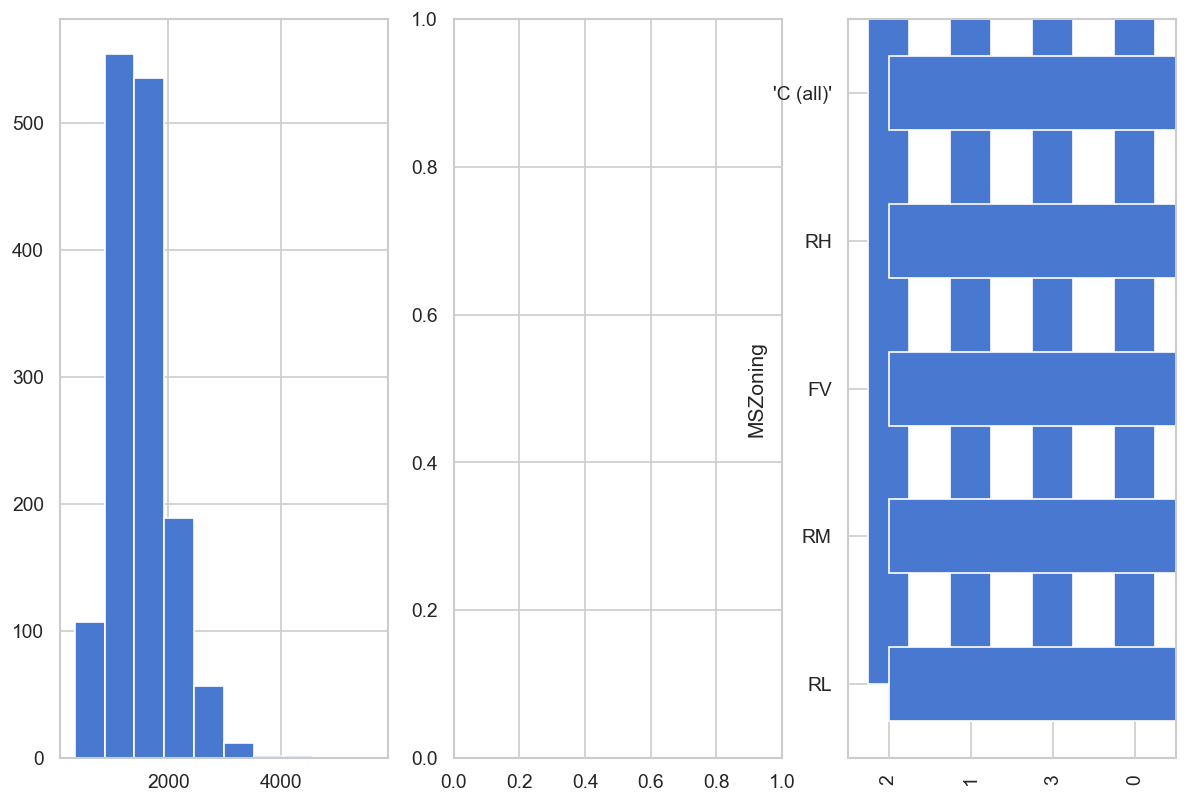

In [69]:
# TASK 5 
# Create 3 side-by-side plots: histogram for GrLivArea, bar for FullBath, barh for MSZoning
# Hint: plt.subplots(1,3), .hist(), .value_counts().plot.bar(), .value_counts().plot.barh()
#
# YOUR CODE HERE

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].hist(df["GrLivArea"])

second_plot = df['FullBath'].value_counts().plot.bar(axes[1])

df['MSZoning'].value_counts().plot.barh(axes[2])

 **Pandas dtype ≠ statistical type!** A zip code stored as `int64` is categorical. Always verify with domain knowledge. See `[Slide 9]`.

---
## Step 3 — Summary Statistics `[Slides 11-16]` 10 min

Three pillars: **center** (mean, median, mode), **spread** (std, IQR, CV), **shape** (skewness, kurtosis).

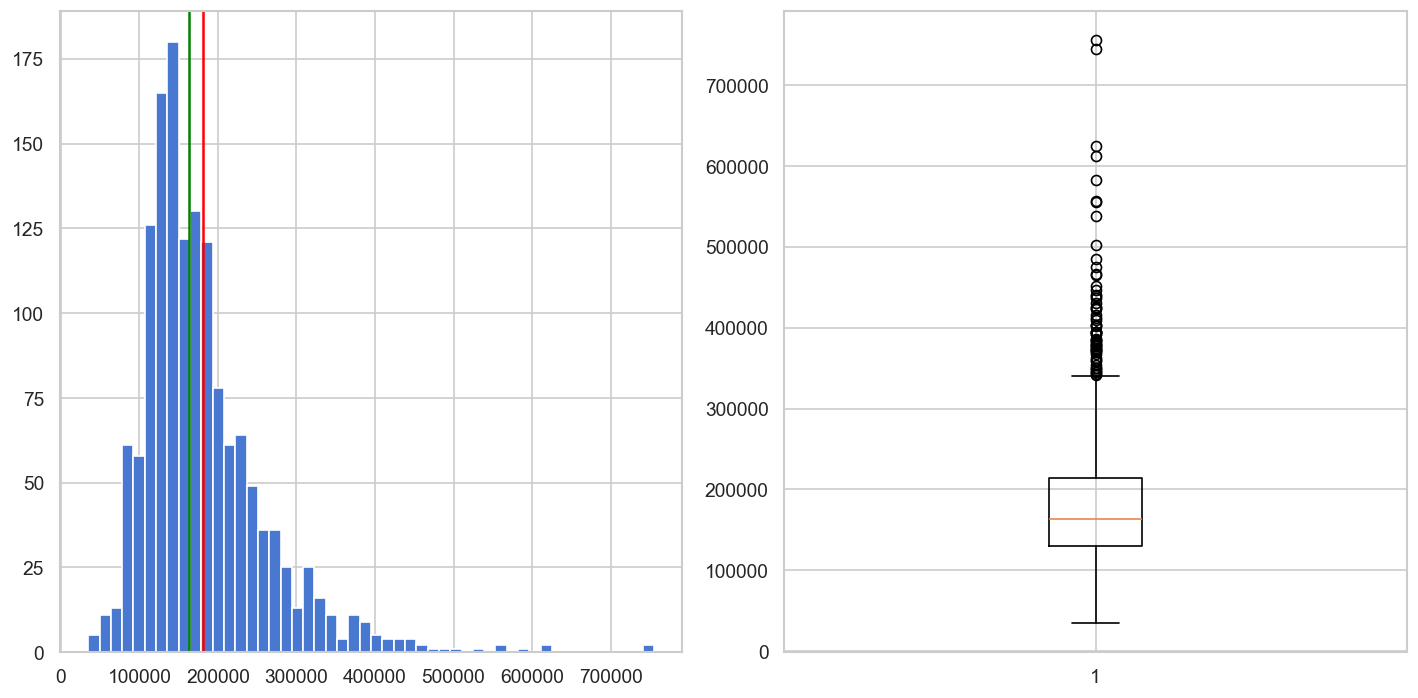

In [84]:
# TASK 6 
# Compute mean, median, mode of SalePrice. Plot histogram with mean/median lines + box plot. [Slide 11]
# Hint: price.mean(), .median(), .mode()[0]. Use ax.axvline() for vertical lines. ax.boxplot() for box plot
#
# YOUR CODE HERE
mean = df["SalePrice"].mean()
median = df["SalePrice"].median()
mode = df["SalePrice"].mode()
#print(f"mean:{mean}",)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(df["SalePrice"], bins = 50)
axes[0].axvline(mean,color="red")
axes[0].axvline(median,color="green")
axes[1].boxplot(df["SalePrice"])
plt.tight_layout()

In [ ]:
# TASK 7 
# Compute Mean, Std, IQR, Range, and CV% for 5 features. Which has highest relative variability?
# Hint: IQR = .quantile(0.75) - .quantile(0.25), CV = std/mean * 100
#
# YOUR CODE HERE
features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt']
disp = pd.DataFrame({
 'Mean': df[features].mean(),
 'Std': df[features].std(),
 'IQR': df[features].quantile(0.75) - df[features].quantile(0.25),
 'Range': df[features].max() - df[features].min(),
 'CV%': df[features].std() / df[features].mean() * 100
}).round(2)
print(disp.to_string())
print('\n→ CV% allows comparison across different scales')
print(' LotArea (CV=94.91%) is far more variable than YearBuilt (CV=1.53%)')

                 Mean      Std      IQR   Range   CV%
SalePrice   180921.20 79442.50 84025.00  720100 43.91
GrLivArea     1515.46   525.48   647.25    5308 34.67
LotArea      10516.83  9981.26  4048.00  213945 94.91
OverallQual      6.10     1.38     2.00       9 22.67
YearBuilt     1971.27    30.20    46.00     138  1.53

→ CV% allows comparison across different scales
 LotArea (CV=43.91%) is far more variable than YearBuilt (CV=1.53%)


In [92]:
# TASK 8 
# Compute skewness and kurtosis for all numerical features. How many have |skew| > 1?
# Hint: df[num_cols].skew(), .kurtosis(). Flag with .abs() > 1
#
# YOUR CODE HERE
shape_stats = pd.DataFrame({
 'Skewness': df[num_cols].skew(),
 'Kurtosis': df[num_cols].kurtosis()
}).sort_values('Skewness', ascending=False)

shape_stats['Skew_flag'] = shape_stats['Skewness'].abs().apply(
 lambda x: ' HIGH' if x > 2 else ' MODERATE' if x > 1 else ' OK')

n_high = (shape_stats['Skewness'].abs() > 1).sum()
print(f'Features with |skewness| > 1: {n_high} / {len(shape_stats)}')
print(f'\nTop 10 most skewed:')
print(shape_stats.head(10).to_string())
print(f'\n→ HIGHly skewed features need log/power transform before modeling [Slide 44]')

Features with |skewness| > 1: 20 / 37

Top 10 most skewed:
               Skewness  Kurtosis Skew_flag
MiscVal           24.48    701.00      HIGH
PoolArea          14.83    223.27      HIGH
LotArea           12.21    203.24      HIGH
3SsnPorch         10.30    123.66      HIGH
LowQualFinSF       9.01     83.23      HIGH
KitchenAbvGr       4.49     21.53      HIGH
BsmtFinSF2         4.26     20.11      HIGH
ScreenPorch        4.12     18.44      HIGH
BsmtHalfBath       4.10     16.40      HIGH
EnclosedPorch      3.09     10.43      HIGH

→ HIGHly skewed features need log/power transform before modeling [Slide 44]


In [91]:
# TASK 9 
# Run df.describe() on the first 10 numerical columns. Transpose the result for readability.
# Hint: df[num_cols[:10]].describe().T
#
# YOUR CODE HERE
df[num_cols[:10]].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.00,56.90,42.30,20.00,20.00,50.00,70.00,190.00
LotFrontage,1201.00,70.05,24.28,21.00,59.00,69.00,80.00,313.00
LotArea,1460.00,10516.83,9981.26,1300.00,7553.50,9478.50,11601.50,215245.00
OverallQual,1460.00,6.10,1.38,1.00,5.00,6.00,7.00,10.00
OverallCond,1460.00,5.58,1.11,1.00,5.00,5.00,6.00,9.00
YearBuilt,1460.00,1971.27,30.20,1872.00,1954.00,1973.00,2000.00,2010.00
YearRemodAdd,1460.00,1984.87,20.65,1950.00,1967.00,1994.00,2004.00,2010.00
MasVnrArea,1452.00,103.69,181.07,0.00,0.00,0.00,166.00,1600.00
BsmtFinSF1,1460.00,443.64,456.10,0.00,0.00,383.50,712.25,5644.00
BsmtFinSF2,1460.00,46.55,161.32,0.00,0.00,0.00,0.00,1474.00


---
## Step 4 — Univariate Analysis `[Slides 18-22]` 12 min

Examine **one variable at a time**. Four views for numerical, two for categorical.

### 4.1 Numerical: Four Views of SalePrice `[Slide 18]`

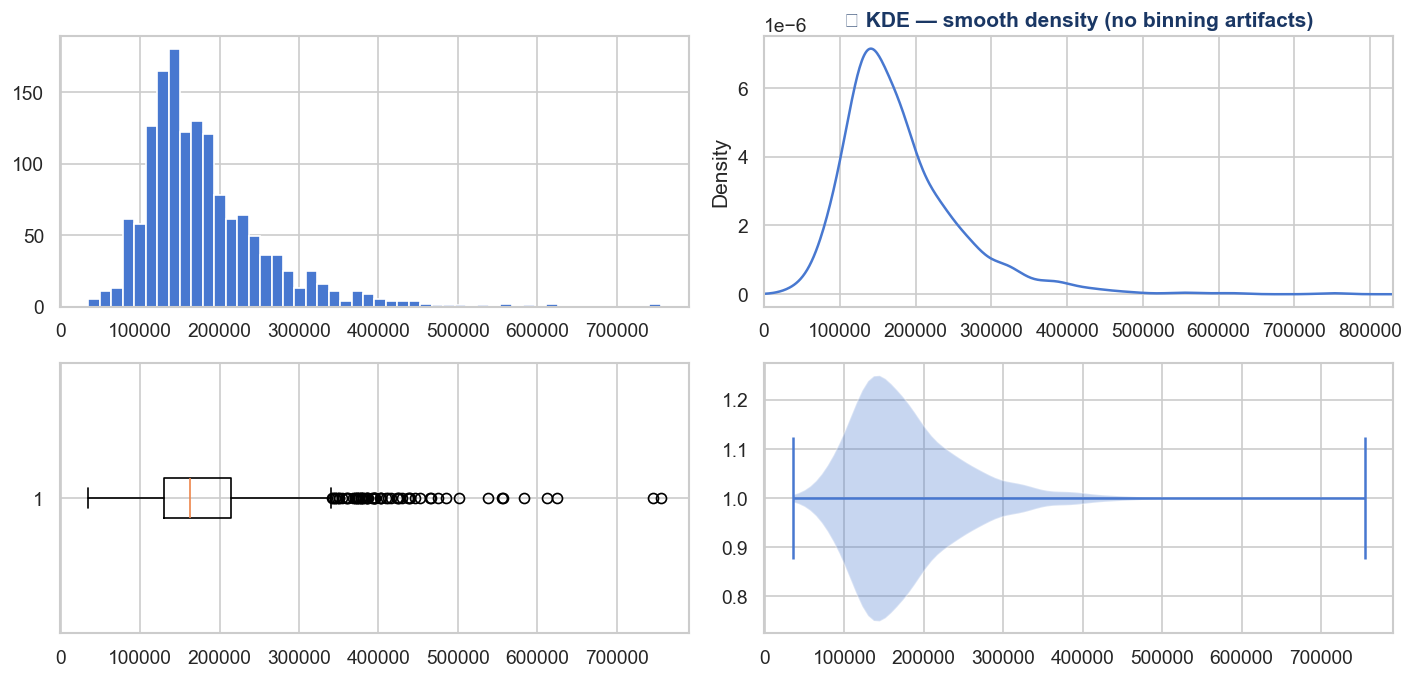

In [ ]:
# TASK 10 
# Create a 2×2 grid showing SalePrice as: histogram, KDE, box plot, violin plot [Slide 18]
# Hint: plt.subplots(2,2). Use .hist(), .plot.kde(), ax.boxplot(vert=False), ax.violinplot(vert=False)
#
# YOUR CODE HERE
fig, axes = plt.subplots(2,2,figsize=(12, 6))
price = df["SalePrice"]


axes[0,0].hist(df["SalePrice"], bins = 50)

df['SalePrice'].plot.kde(ax=axes[0,1])
axes[0,1].set_xlim(0, df['SalePrice'].max()*1.1)
axes[0,1].set_title('② KDE — smooth density (no binning artifacts)', fontweight='bold', color=NAVY)

axes[1,0].boxplot(price, vert = False)

axes[1,1].violinplot(price, vert = False)

plt.tight_layout()


### 4.2 Bin Size Effect `[Slide 19]`

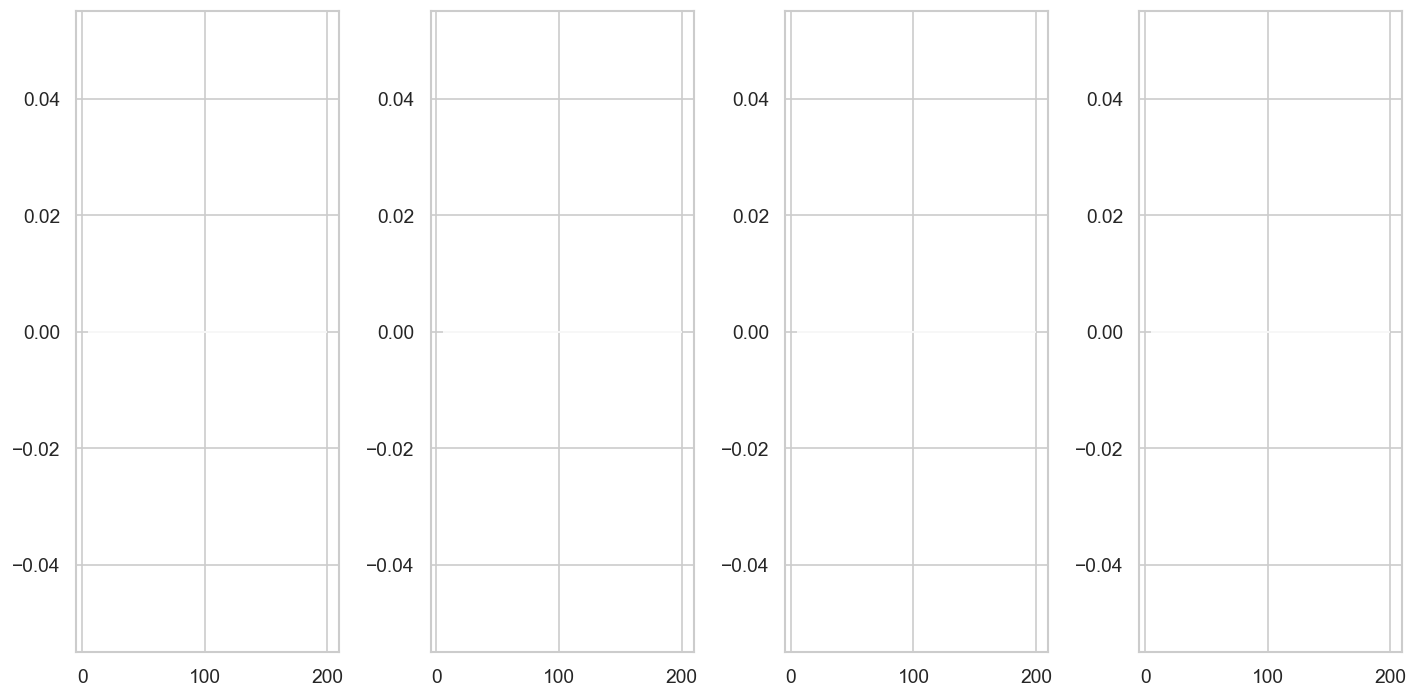

In [111]:
# TASK 11 
# Plot SalePrice histograms with 5, 20, 50, and 200 bins side by side. Which reveals the most structure?
# Hint: plt.subplots(1,4), loop over [5, 20, 50, 200]
#
# YOUR CODE HERE
fig, axes = plt.subplots(1,4,figsize=(12, 6))

bins = [5,20,50,200]

for ax, nb in zip(axes,bins):
    ax.hist(df["SalePrice"], bins = bins)
    plt.tight_layout()


### 4.3 QQ-Plot: Testing Normality `[Slide 21]`

In [ ]:
# TASK 12 
# Create QQ-plots for SalePrice (original) and log(SalePrice). Run Shapiro-Wilk on both.
# Hint: stats.probplot(data, plot=ax). stats.shapiro(sample). Use np.log1p() for log(x+1)
#
# YOUR CODE HERE
log_price = np.log1p
stats.probplot(df["SalePrice"], plot=ax)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952], shape=(1460,)),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], shape=(1460,))),
 (np.float64(74160.16474519415),
  np.float64(180921.19589041095),
  np.float64(0.9319665641512986)))

### 4.4 Categorical Features `[Slide 22]`

In [ ]:
# TASK 13 
# Plot: top 10 neighborhoods (barh), OverallQual distribution (bar), cardinality of all categoricals
# Hint: value_counts().head(10).plot.barh(), nunique().sort_values()
#
# YOUR CODE HERE


---
## Step 5 — Bivariate Analysis `[Slides 24-29]` 15 min

Relationships between **pairs** of variables. This is where modeling insights emerge.

### 5.1 Numerical × Numerical: Scatter + Pearson `[Slide 24]`

In [ ]:
# TASK 14 
# Compute correlation of all numerical features with SalePrice. Show top 8 positive and top 3 negative.
# Hint: df[num_cols].corrwith(df['SalePrice']).sort_values(ascending=False)
#
# YOUR CODE HERE


In [ ]:
# TASK 15 
# Scatter plots with regression line for top 4 predictors of SalePrice
# Hint: np.polyfit() for regression, np.polyval() to evaluate. ax.scatter() + ax.plot()
#
# YOUR CODE HERE


### 5.2 Correlation Heatmap + Spearman `[Slides 25-26]`

In [ ]:
# TASK 16 
# Create correlation heatmap (lower triangle) for top 8 features. Detect multicollinearity (r > 0.8).
# Hint: np.triu() for mask, sns.heatmap(mask=mask, annot=True). Loop over pairs to find |r| > 0.8
#
# YOUR CODE HERE


In [ ]:
# TASK 17 
# Compare Pearson vs Spearman for each top feature. Which features show non-linear relationships?
# Hint: df[feat].corr(df['SalePrice'], method='pearson') vs method='spearman'
#
# YOUR CODE HERE


### 5.3 Categorical × Numerical: ANOVA `[Slides 27-28]`

In [ ]:
# TASK 18 
# Box plots: SalePrice by ExterQual (ordered) and by top 8 Neighborhoods. Run ANOVA on ExterQual groups.
# Hint: sns.boxplot(order=...). stats.f_oneway(*groups) for ANOVA. [Slides 27-28]
#
# YOUR CODE HERE


### 5.4 Categorical × Categorical: Chi² `[Slide 29]`

In [ ]:
# TASK 19 
# Create contingency table for MSZoning × BldgType. Run chi-squared test. Heatmap observed vs expected.
# Hint: pd.crosstab(). stats.chi2_contingency(ct) returns chi2, p, dof, expected. [Slide 29]
#
# YOUR CODE HERE


---
## Step 6 — Multivariate Analysis `[Slides 31-33]` 8 min

### 6.1 Pair Plot `[Slide 31]`

In [ ]:
# TASK 20 
# Pair plot of SalePrice, GrLivArea, YearBuilt, TotalBsmtSF, colored by quality bins
# Hint: pd.cut() to bin OverallQual into 4 groups, sns.pairplot(hue=...)
#
# YOUR CODE HERE


### 6.2 PCA `[Slides 32-33]`

In [ ]:
# TASK 21 
# PCA: scale data → fit 10 components → plot 2D projection colored by SalePrice + scree plot
# Hint: StandardScaler().fit_transform(), PCA(n_components=10).fit_transform(). Scree: cumsum of explained_variance_ratio_
#
# YOUR CODE HERE


---
## Step 7 — Missing Data `[Slides 36-38]` 10 min

> **The pattern of missingness contains information!** — See Rubin's taxonomy `[Slide 36]`

| Type | Mechanism | Strategy |
|------|-----------|----------|
| **MCAR** | Independent of all data | Drop rows |
| **MAR** | Depends on *observed* data | Impute |
| **MNAR** | Depends on *missing value itself* | Domain knowledge |

In [ ]:
# TASK 22 
# Count features with missing values. Show top 10 with their % missing.
# Hint: df.isnull().sum() / len(df) * 100. Sort descending.
#
# YOUR CODE HERE


In [ ]:
# TASK 23 
# Bar chart of top 12 missing features. Heatmap of missingness patterns. What co-occurrence patterns do you see?
# Hint: df[cols].isnull().astype(int) for the matrix. sns.heatmap() with binary colormap. [Slide 37]
#
# YOUR CODE HERE


In [ ]:
# TASK 24 
# Compare Mean, Median, and KNN imputation on LotFrontage. Which preserves the distribution best?
# Hint: KNNImputer(n_neighbors=5) from sklearn.impute. Use nearby features (LotArea, GrLivArea). [Slide 38]
#
# YOUR CODE HERE


---
## Step 8 — Outlier Detection `[Slides 40-42]` 8 min

### 8.1 IQR Method & Z-Score `[Slide 40]`

In [ ]:
# TASK 25 
# Write IQR and Z-score outlier functions. Apply to GrLivArea. Scatter plot showing outliers in red.
# Hint: IQR: Q1-1.5*IQR, Q3+1.5*IQR. Z-score: |z| > 3. [Slide 40]
#
# YOUR CODE HERE


### 8.2 Isolation Forest `[Slide 41]`

In [ ]:
# TASK 26 
# Isolation Forest on GrLivArea × SalePrice (contamination=0.02). Scatter normal vs outlier.
# Hint: IsolationForest(contamination=0.02). fit_predict() returns 1 (normal) or -1 (outlier). [Slide 41]
#
# YOUR CODE HERE


---
## Step 9 — Data Transformations `[Slides 44-46]` 8 min

### 9.1 Log Transform `[Slide 44]`

In [ ]:
# TASK 27 
# Apply log1p transform to SalePrice, LotArea, GrLivArea. Show before/after with skewness values.
# Hint: np.log1p(). .skew() for skewness. Side-by-side histograms. [Slide 44]
#
# YOUR CODE HERE


### 9.2 Feature Scaling `[Slide 45]`

In [ ]:
# TASK 28 
# Apply 4 scalers to GrLivArea. Side-by-side histograms. Which preserves shape? Which normalizes?
# Hint: StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer from sklearn.preprocessing. [Slide 45]
#
# YOUR CODE HERE


### 9.3 Encoding `[Slide 46]`

In [ ]:
# TASK 29 
# Apply label encoding to ExterQual, one-hot to BldgType, target encoding to Neighborhood.
# Hint: .map(dict) for label. pd.get_dummies() for one-hot. .groupby().mean() for target. [Slide 46]
#
# YOUR CODE HERE


---
## Step 10 — Wrap-up `[Slides 48-53]` 2 min

### Anscombe's Quartet — Why We ALWAYS Visualize `[Slide 48]`

In [ ]:
# Anscombe's Quartet 
anscombe = sns.load_dataset('anscombe')

print('Four datasets with IDENTICAL statistics:')
for ds in ['I', 'II', 'III', 'IV']:
 d = anscombe[anscombe['dataset'] == ds]
 print(f' Dataset {ds}: mean(x)={d["x"].mean():.1f}, mean(y)={d["y"].mean():.2f}, '
 f'r={d["x"].corr(d["y"]):.3f}')

g = sns.lmplot(data=anscombe, x='x', y='y', col='dataset', col_wrap=2,
 height=3, aspect=1.3, scatter_kws={'s': 40, 'color': STEEL},
 line_kws={'color': 'red', 'lw': 2})
g.fig.suptitle('Same Statistics → Completely Different Patterns!', fontweight='bold', color=CORAL, fontsize=14, y=1.02)
plt.show()
print('\n LESSON: Never skip visualization. Statistics can lie. [Slide 48]')

### EDA Checklist — Before You Model `[Slide 53]`

Run through this checklist before starting any modeling:

- [ ] Shape, types, and column names understood?
- [ ] Missing value patterns identified and strategy decided?
- [ ] Every feature's distribution examined?
- [ ] Outliers detected and handling strategy chosen?
- [ ] Feature-target correlations verified?
- [ ] Multicollinearity addressed?
- [ ] Transformations applied (log, scaling)?
- [ ] Categorical features encoded?
- [ ] All findings documented?

> **Only when all boxes are checked → proceed to modeling.**

---

### Summary of what we did today

| Step | What | Key Finding (Ames) |
|------|------|--------------------|
| 1 | First contact | 1,460 × 81, no duplicates |
| 2 | Data types | 38 numerical, 43 categorical |
| 3 | Summary stats | SalePrice right-skewed (skew ≈ 1.9) |
| 4 | Univariate | Many features highly skewed; QQ confirms non-normality |
| 5 | Bivariate | OverallQual (r=0.79) and GrLivArea (r=0.71) top predictors |
| 6 | Multivariate | 6 PCs capture 90% variance; quality separates clusters |
| 7 | Missing data | 19 features missing; PoolQC = 99.5% (no pool, not error) |
| 8 | Outliers | 2 extreme GrLivArea points; Isolation Forest detects multivariate |
| 9 | Transforms | Log reduces skew from 1.9 → 0.1; RobustScaler for outliers |

---
*End of Hands-On Lab — LUISS Guido Carli*

---
### Well done
You've completed the full EDA pipeline. Compare your solutions with the complete notebook to check your work.

**Key takeaway:** This workflow (Steps 1→9) works on **any** tabular dataset. Memorize the structure, not the code.